<a href="https://colab.research.google.com/github/suponev/model/blob/master/threepeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Массив M
(0.5591808617174452-0.35489908320835895j)
(1.3056664150201331+0.24713844481742195j)
(-0.9007231942511363+0.5366253851079954j)

Массив А
(-10.132263314869288-4.7451413397584785j)
(7.90743763678613+0.3264474071338518j)
(-13.77517432191685+4.418693932624629j)

Массив m (сдвиги)
(-2.8276381133202992+2.060210024239016j)
(0.9353417519093199-1.4215693567676333j)
(13.021440004064107-0.2366137078203288j)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


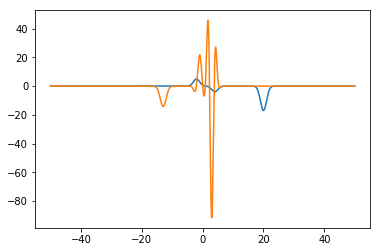

In [16]:
import random
import numpy as np 
import matplotlib.pyplot as plt

# Сигма
sig = 1

# Константа h
h = 0.2

# Массив значений x
x = np.arange(-50, 50 , 0.001);


# Задание сигнала
def rnd(x):
    return 
  
# Задание сигнала
def signal(x):
    return 5*np.exp(-(x+2)**2/(2*sig**2))-4*np.exp(-(x-4)**2/(2*sig**2))-17*np.exp(-(x-20)**2/(2*sig**2))
  
# Задание аппроксимирующей функции
def phi(x):
    return np.exp(-(x)**2/(2*sig**2)) 
# Задание аппроксимирующей функции
def model(x , A ,m):
    return A[0]*phi(x+m[0])+A[1]*phi(x+m[1])+A[2]*phi(x+m[2])
  
# Расчет мемента k (для исходного сигнала) 
def mu(signal,k):
    return signal*np.exp(-1j*k*h*x)
  
# Расчет alpha (для аппрокимирующей функции)
def alpha(x,k):
    return phi(x)*np.exp(-1j*h*k*x)
  
# Функция вывода массива
def printarr(arr , name):
    print(name)
    for i in range(len(arr)):
      print(arr[i])
    print('')
def calcM(b):
    det = b[2] * b[2] * b[2] + b[1] * b[1] * b[4] + b[3] * b[3] * b[0] - b[0] * b[2] * b[4] - 2 * b[1] * b[2] * b[3];
    det1 = b[3] * b[2] * b[2] + b[1] * b[1] * b[5] + b[4] * b[3] * b[0] - b[0] * b[2] * b[5] - b[4] * b[1] * b[2] - b[1] * b[3] * b[3];
    det2 = b[2] * b[2] * b[4] + b[3] * b[5] * b[0] + b[3] * b[1] * b[4] - b[0] * b[4] * b[4] - b[5] * b[2] * b[1] - b[3] * b[3] * b[2];
    det3 = b[2] * b[2] * b[5] + b[1] * b[4] * b[4] + b[3] * b[3] * b[3] - b[3] * b[2] * b[4] - b[3] * b[4] * b[2] - b[3] * b[1] * b[5];
    c2 = det1 / det;
    c1 = det2 / det;
    c0 = det3 / det;
    bb = -c2
    c = -c1
    d = -c0

    p = c2
    q = c1
    r = c0
    m=[0,0,0]
    p1 = c - bb * bb / 3;
    q1 = (2 * bb * bb * bb / 27) - (bb * c / 3) + d;
    Q = (((p1 / 3.0)** 3)) + ((q1 / 2.0)** 2)

    phi = 0

    rho = np.sqrt((q1 / 2) * (q1 / 2) + np.abs(Q));
    if (q1 < 0):
        phi = np.arctan(-2 * np.sqrt(np.abs(Q)) / q1)
    else:
        if (q1 > 0):
            phi = np.pi - np.arctan(2 * np.sqrt(np.abs(Q)) / q1);
        else:
            phi = Math.PI / 2;
    m[1] = 2 * np.exp(np.log(rho) / 3) * np.cos(phi / 3) + p / 3;
    m[2] = 2 * np.exp(np.log(rho) / 3) * np.cos(phi / 3 + 2 * np.pi / 3) + p / 3;
    m[0] = 2 * np.exp(np.log(rho) / 3) * np.cos(phi / 3 + 4 * np.pi / 3) + p / 3;
    return m

# Генерируем шум  
noise = np.random.normal(0, 1, len(x))

s = signal(x) #+noise

b = []
for k in [0,1,2,3,4,5]:
    #комплексные моменты исходного сигнала
    muk = np.trapz(mu(s,k), x);
    bk = muk/np.trapz(alpha(x,k), x);
    b.append(bk);
# print(b);

M=[0,0,0] 
A=[0,0,0]
m=[0,0,0] 

M = calcM(b)

printarr(M,'Массив M')

detA = np.linalg.det(np.array([[1, 1, 1], [M[0], M[1], M[2]], [M[0] * M[0], M[1] * M[1], M[2] * M[2]]]));
A[0] = np.linalg.det(np.array([[b[0], 1, 1], [b[1], M[1], M[2]],[ b[2],M[1] * M[1], M[2] * M[2]]])) / detA;
A[1] = np.linalg.det(np.array([[1, b[0], 1], [M[0], b[1], M[2]],[ M[0] * M[0], b[2], M[2] * M[2]]])) / detA;
A[2] = np.linalg.det(np.array([[1, 1, b[0]], [M[0], M[1], b[1]],[ M[0] * M[0], M[1] * M[1], b[2]]])) / detA;

printarr(A,'Массив А')

m[0]=np.log(M[0])/h/1j
m[1]=np.log(M[1])/h/1j
m[2]=np.log(M[2])/h/1j

print("Массив m (сдвиги)")
print(m[0])
print(m[1])
print(m[2])

# plt.plot(x, sp.real)
plt.plot(x , s )
plt.plot(x , model(x , A,m) )

plt.show()



